In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
plt.rcParams['font.size'] = 14

from tsfresh import extract_features
from xgboost import XGBClassifier, plot_tree
from sklearn.metrics import accuracy_score

%run data_generator.py

In [2]:
def get_df(x):
    '''Build input dataframe for given data series
    Input:
    var = array of time series, (#samples,time,1)
    Return:
    df = dataframe ready for features extraction
    '''
    
    #N = #samples, t = timesteps
    N, t = x.shape[0], x.shape[1]
    #build id columns
    id_col = np.repeat(np.arange(N),t)
    #build time columns
    time_col = np.tile(np.arange(t),N)
    #build var columns
    x_col = x.flatten()
      
    #build dict for df
    x_dict = {'id':id_col,'time':time_col,'value':x_col}
        
    #return dataframe
    return pd.DataFrame(x_dict)

In [4]:
#We assume 20 independent training and test sets for each N (number of samples) 
#then extract features for each and save them. 
#Each sample, generate for 300+N samples and after extracting feartures, the first 300 samples split as a test set.

tr_list=[],
test_list=[]
N_list=[20,50,100,150,200,250,300,400,500]
minval=0.005

for n in N_list:
    for s in range(n,n+20):
        x,y=data_generator(s,n)
        N,L = len(x), len(x[0])
        n_class = 3    #  = len(np.unique(y))
        print('data: ',N-300)    
        df = get_df(x)
        x_features = extract_features(
                                df, #our dataframe
                                column_id='id', #sample id, from 0 to N
                                column_sort='time', #timestep, from 0 to t
                                column_kind=None, #we have only one feature
                                column_value='value', #value of input 
                                n_jobs=4) #number of cores
        x_features.to_csv('x_feature'+str(n)+'_'+str(s)+'.csv')
        
        
        

data:  20


Feature Extraction: 100%|███████████████████████| 20/20 [00:16<00:00,  1.20it/s]


data:  20


Feature Extraction: 100%|███████████████████████| 20/20 [00:16<00:00,  1.23it/s]


data:  20


Feature Extraction: 100%|███████████████████████| 20/20 [00:15<00:00,  1.30it/s]


data:  20


Feature Extraction: 100%|███████████████████████| 20/20 [00:15<00:00,  1.30it/s]


data:  20


Feature Extraction: 100%|███████████████████████| 20/20 [00:14<00:00,  1.35it/s]


data:  20


Feature Extraction: 100%|███████████████████████| 20/20 [00:14<00:00,  1.35it/s]


data:  20


Feature Extraction: 100%|███████████████████████| 20/20 [00:14<00:00,  1.35it/s]


data:  20


Feature Extraction: 100%|███████████████████████| 20/20 [00:15<00:00,  1.30it/s]


data:  20


Feature Extraction: 100%|███████████████████████| 20/20 [00:15<00:00,  1.29it/s]


data:  20


Feature Extraction: 100%|███████████████████████| 20/20 [00:15<00:00,  1.33it/s]


data:  20


Feature Extraction: 100%|███████████████████████| 20/20 [00:15<00:00,  1.29it/s]


data:  20


Feature Extraction: 100%|███████████████████████| 20/20 [00:15<00:00,  1.29it/s]


data:  20


Feature Extraction: 100%|███████████████████████| 20/20 [00:15<00:00,  1.32it/s]


data:  20


Feature Extraction: 100%|███████████████████████| 20/20 [00:15<00:00,  1.32it/s]


data:  20


Feature Extraction: 100%|███████████████████████| 20/20 [00:15<00:00,  1.32it/s]


data:  20


Feature Extraction: 100%|███████████████████████| 20/20 [00:14<00:00,  1.34it/s]


data:  20


Feature Extraction: 100%|███████████████████████| 20/20 [00:15<00:00,  1.29it/s]


data:  20


Feature Extraction: 100%|███████████████████████| 20/20 [00:15<00:00,  1.32it/s]


data:  20


Feature Extraction: 100%|███████████████████████| 20/20 [00:14<00:00,  1.33it/s]


data:  20


Feature Extraction: 100%|███████████████████████| 20/20 [00:14<00:00,  1.35it/s]


data:  50


Feature Extraction: 100%|███████████████████████| 20/20 [00:16<00:00,  1.20it/s]


data:  50


Feature Extraction: 100%|███████████████████████| 20/20 [00:16<00:00,  1.18it/s]


data:  50


Feature Extraction: 100%|███████████████████████| 20/20 [00:17<00:00,  1.17it/s]


data:  50


Feature Extraction: 100%|███████████████████████| 20/20 [00:16<00:00,  1.22it/s]


data:  50


Feature Extraction: 100%|███████████████████████| 20/20 [00:16<00:00,  1.21it/s]


data:  50


Feature Extraction: 100%|███████████████████████| 20/20 [00:16<00:00,  1.20it/s]


data:  50


Feature Extraction: 100%|███████████████████████| 20/20 [00:16<00:00,  1.23it/s]


data:  50


Feature Extraction: 100%|███████████████████████| 20/20 [00:16<00:00,  1.20it/s]


data:  50


Feature Extraction: 100%|███████████████████████| 20/20 [00:16<00:00,  1.22it/s]


data:  50


Feature Extraction: 100%|███████████████████████| 20/20 [00:16<00:00,  1.24it/s]


data:  50


Feature Extraction: 100%|███████████████████████| 20/20 [00:16<00:00,  1.24it/s]


data:  50


Feature Extraction: 100%|███████████████████████| 20/20 [00:15<00:00,  1.26it/s]


data:  50


Feature Extraction: 100%|███████████████████████| 20/20 [00:16<00:00,  1.20it/s]


data:  50


Feature Extraction: 100%|███████████████████████| 20/20 [00:16<00:00,  1.21it/s]


data:  50


Feature Extraction: 100%|███████████████████████| 20/20 [00:16<00:00,  1.21it/s]


data:  50


Feature Extraction: 100%|███████████████████████| 20/20 [00:16<00:00,  1.21it/s]


data:  50


Feature Extraction: 100%|███████████████████████| 20/20 [00:16<00:00,  1.22it/s]


data:  50


Feature Extraction: 100%|███████████████████████| 20/20 [00:16<00:00,  1.20it/s]


data:  50


Feature Extraction: 100%|███████████████████████| 20/20 [00:16<00:00,  1.22it/s]


data:  50


Feature Extraction: 100%|███████████████████████| 20/20 [00:16<00:00,  1.21it/s]


data:  100


Feature Extraction: 100%|███████████████████████| 20/20 [00:19<00:00,  1.04it/s]


data:  100


Feature Extraction: 100%|███████████████████████| 20/20 [00:19<00:00,  1.05it/s]


data:  100


Feature Extraction: 100%|███████████████████████| 20/20 [00:19<00:00,  1.05it/s]


data:  100


Feature Extraction: 100%|███████████████████████| 20/20 [00:18<00:00,  1.07it/s]


data:  100


Feature Extraction: 100%|███████████████████████| 20/20 [00:19<00:00,  1.02it/s]


data:  100


Feature Extraction: 100%|███████████████████████| 20/20 [00:18<00:00,  1.05it/s]


data:  100


Feature Extraction: 100%|███████████████████████| 20/20 [00:19<00:00,  1.04it/s]


data:  100


Feature Extraction: 100%|███████████████████████| 20/20 [00:18<00:00,  1.08it/s]


data:  100


Feature Extraction: 100%|███████████████████████| 20/20 [00:18<00:00,  1.09it/s]


data:  100


Feature Extraction: 100%|███████████████████████| 20/20 [00:18<00:00,  1.05it/s]


data:  100


Feature Extraction: 100%|███████████████████████| 20/20 [00:18<00:00,  1.07it/s]


data:  100


Feature Extraction: 100%|███████████████████████| 20/20 [00:18<00:00,  1.11it/s]


data:  100


Feature Extraction: 100%|███████████████████████| 20/20 [00:18<00:00,  1.07it/s]


data:  100


Feature Extraction: 100%|███████████████████████| 20/20 [00:17<00:00,  1.12it/s]


data:  100


Feature Extraction: 100%|███████████████████████| 20/20 [00:19<00:00,  1.04it/s]


data:  100


Feature Extraction: 100%|███████████████████████| 20/20 [00:18<00:00,  1.06it/s]


data:  100


Feature Extraction: 100%|███████████████████████| 20/20 [00:19<00:00,  1.04it/s]


data:  100


Feature Extraction: 100%|███████████████████████| 20/20 [00:18<00:00,  1.11it/s]


data:  100


Feature Extraction: 100%|███████████████████████| 20/20 [00:18<00:00,  1.06it/s]


data:  100


Feature Extraction: 100%|███████████████████████| 20/20 [00:18<00:00,  1.10it/s]


data:  150


Feature Extraction: 100%|███████████████████████| 20/20 [00:21<00:00,  1.07s/it]


data:  150


Feature Extraction: 100%|███████████████████████| 20/20 [00:21<00:00,  1.07s/it]


data:  150


Feature Extraction: 100%|███████████████████████| 20/20 [00:21<00:00,  1.08s/it]


data:  150


Feature Extraction: 100%|███████████████████████| 20/20 [00:21<00:00,  1.06s/it]


data:  150


Feature Extraction: 100%|███████████████████████| 20/20 [00:21<00:00,  1.07s/it]


data:  150


Feature Extraction: 100%|███████████████████████| 20/20 [00:21<00:00,  1.09s/it]


data:  150


Feature Extraction: 100%|███████████████████████| 20/20 [00:21<00:00,  1.06s/it]


data:  150


Feature Extraction: 100%|███████████████████████| 20/20 [00:21<00:00,  1.10s/it]


data:  150


Feature Extraction: 100%|███████████████████████| 20/20 [00:21<00:00,  1.05s/it]


data:  150


Feature Extraction: 100%|███████████████████████| 20/20 [00:20<00:00,  1.04s/it]


data:  150


Feature Extraction: 100%|███████████████████████| 20/20 [00:21<00:00,  1.06s/it]


data:  150


Feature Extraction: 100%|███████████████████████| 20/20 [00:21<00:00,  1.05s/it]


data:  150


Feature Extraction: 100%|███████████████████████| 20/20 [00:20<00:00,  1.03s/it]


data:  150


Feature Extraction: 100%|███████████████████████| 20/20 [00:20<00:00,  1.05s/it]


data:  150


Feature Extraction: 100%|███████████████████████| 20/20 [00:21<00:00,  1.06s/it]


data:  150


Feature Extraction: 100%|███████████████████████| 20/20 [00:21<00:00,  1.07s/it]


data:  150


Feature Extraction: 100%|███████████████████████| 20/20 [00:21<00:00,  1.08s/it]


data:  150


Feature Extraction: 100%|███████████████████████| 20/20 [00:21<00:00,  1.09s/it]


data:  150


Feature Extraction: 100%|███████████████████████| 20/20 [00:21<00:00,  1.07s/it]


data:  150


Feature Extraction: 100%|███████████████████████| 20/20 [00:21<00:00,  1.05s/it]


data:  200


Feature Extraction: 100%|███████████████████████| 20/20 [00:23<00:00,  1.17s/it]


data:  200


Feature Extraction: 100%|███████████████████████| 20/20 [00:23<00:00,  1.19s/it]


data:  200


Feature Extraction: 100%|███████████████████████| 20/20 [00:24<00:00,  1.21s/it]


data:  200


Feature Extraction: 100%|███████████████████████| 20/20 [00:23<00:00,  1.18s/it]


data:  200


Feature Extraction: 100%|███████████████████████| 20/20 [00:23<00:00,  1.20s/it]


data:  200


Feature Extraction: 100%|███████████████████████| 20/20 [00:23<00:00,  1.17s/it]


data:  200


Feature Extraction: 100%|███████████████████████| 20/20 [00:23<00:00,  1.17s/it]


data:  200


Feature Extraction: 100%|███████████████████████| 20/20 [00:22<00:00,  1.14s/it]


data:  200


Feature Extraction: 100%|███████████████████████| 20/20 [00:22<00:00,  1.15s/it]


data:  200


Feature Extraction: 100%|███████████████████████| 20/20 [00:23<00:00,  1.17s/it]


data:  200


Feature Extraction: 100%|███████████████████████| 20/20 [00:23<00:00,  1.19s/it]


data:  200


Feature Extraction: 100%|███████████████████████| 20/20 [00:23<00:00,  1.18s/it]


data:  200


Feature Extraction: 100%|███████████████████████| 20/20 [00:24<00:00,  1.20s/it]


data:  200


Feature Extraction: 100%|███████████████████████| 20/20 [00:23<00:00,  1.19s/it]


data:  200


Feature Extraction: 100%|███████████████████████| 20/20 [00:23<00:00,  1.18s/it]


data:  200


Feature Extraction: 100%|███████████████████████| 20/20 [00:24<00:00,  1.20s/it]


data:  200


Feature Extraction: 100%|███████████████████████| 20/20 [00:23<00:00,  1.18s/it]


data:  200


Feature Extraction: 100%|███████████████████████| 20/20 [00:23<00:00,  1.17s/it]


data:  200


Feature Extraction: 100%|███████████████████████| 20/20 [00:23<00:00,  1.17s/it]


data:  200


Feature Extraction: 100%|███████████████████████| 20/20 [00:23<00:00,  1.18s/it]


data:  250


Feature Extraction: 100%|███████████████████████| 20/20 [00:25<00:00,  1.28s/it]


data:  250


Feature Extraction: 100%|███████████████████████| 20/20 [00:25<00:00,  1.29s/it]


data:  250


Feature Extraction: 100%|███████████████████████| 20/20 [00:25<00:00,  1.28s/it]


data:  250


Feature Extraction: 100%|███████████████████████| 20/20 [00:25<00:00,  1.27s/it]


data:  250


Feature Extraction: 100%|███████████████████████| 20/20 [00:24<00:00,  1.24s/it]


data:  250


Feature Extraction: 100%|███████████████████████| 20/20 [00:25<00:00,  1.29s/it]


data:  250


Feature Extraction: 100%|███████████████████████| 20/20 [00:26<00:00,  1.34s/it]


data:  250


Feature Extraction: 100%|███████████████████████| 20/20 [00:24<00:00,  1.22s/it]


data:  250


Feature Extraction: 100%|███████████████████████| 20/20 [00:26<00:00,  1.32s/it]


data:  250


Feature Extraction: 100%|███████████████████████| 20/20 [00:25<00:00,  1.30s/it]


data:  250


Feature Extraction: 100%|███████████████████████| 20/20 [00:24<00:00,  1.22s/it]


data:  250


Feature Extraction: 100%|███████████████████████| 20/20 [00:25<00:00,  1.26s/it]


data:  250


Feature Extraction: 100%|███████████████████████| 20/20 [00:25<00:00,  1.29s/it]


data:  250


Feature Extraction: 100%|███████████████████████| 20/20 [00:25<00:00,  1.28s/it]


data:  250


Feature Extraction: 100%|███████████████████████| 20/20 [00:26<00:00,  1.31s/it]


data:  250


Feature Extraction: 100%|███████████████████████| 20/20 [00:25<00:00,  1.28s/it]


data:  250


Feature Extraction: 100%|███████████████████████| 20/20 [00:24<00:00,  1.25s/it]


data:  250


Feature Extraction: 100%|███████████████████████| 20/20 [00:25<00:00,  1.25s/it]


data:  250


Feature Extraction: 100%|███████████████████████| 20/20 [00:25<00:00,  1.29s/it]


data:  250


Feature Extraction: 100%|███████████████████████| 20/20 [00:25<00:00,  1.29s/it]


data:  300


Feature Extraction: 100%|███████████████████████| 20/20 [00:27<00:00,  1.39s/it]


data:  300


Feature Extraction: 100%|███████████████████████| 20/20 [00:28<00:00,  1.41s/it]


data:  300


Feature Extraction: 100%|███████████████████████| 20/20 [00:28<00:00,  1.43s/it]


data:  300


Feature Extraction: 100%|███████████████████████| 20/20 [00:28<00:00,  1.41s/it]


data:  300


Feature Extraction: 100%|███████████████████████| 20/20 [00:27<00:00,  1.39s/it]


data:  300


Feature Extraction: 100%|███████████████████████| 20/20 [00:27<00:00,  1.39s/it]


data:  300


Feature Extraction: 100%|███████████████████████| 20/20 [00:27<00:00,  1.38s/it]


data:  300


Feature Extraction: 100%|███████████████████████| 20/20 [00:28<00:00,  1.40s/it]


data:  300


Feature Extraction: 100%|███████████████████████| 20/20 [00:27<00:00,  1.37s/it]


data:  300


Feature Extraction: 100%|███████████████████████| 20/20 [00:28<00:00,  1.41s/it]


data:  300


Feature Extraction: 100%|███████████████████████| 20/20 [00:26<00:00,  1.32s/it]


data:  300


Feature Extraction: 100%|███████████████████████| 20/20 [00:28<00:00,  1.42s/it]


data:  300


Feature Extraction: 100%|███████████████████████| 20/20 [00:28<00:00,  1.40s/it]


data:  300


Feature Extraction: 100%|███████████████████████| 20/20 [00:28<00:00,  1.40s/it]


data:  300


Feature Extraction: 100%|███████████████████████| 20/20 [00:26<00:00,  1.35s/it]


data:  300


Feature Extraction: 100%|███████████████████████| 20/20 [00:27<00:00,  1.40s/it]


data:  300


Feature Extraction: 100%|███████████████████████| 20/20 [00:27<00:00,  1.35s/it]


data:  300


Feature Extraction: 100%|███████████████████████| 20/20 [00:28<00:00,  1.40s/it]


data:  300


Feature Extraction: 100%|███████████████████████| 20/20 [00:31<00:00,  1.60s/it]


data:  300


Feature Extraction: 100%|███████████████████████| 20/20 [00:28<00:00,  1.43s/it]


data:  400


Feature Extraction: 100%|███████████████████████| 20/20 [00:32<00:00,  1.63s/it]


data:  400


Feature Extraction: 100%|███████████████████████| 20/20 [00:33<00:00,  1.66s/it]


data:  400


Feature Extraction: 100%|███████████████████████| 20/20 [00:33<00:00,  1.67s/it]


data:  400


Feature Extraction: 100%|███████████████████████| 20/20 [00:31<00:00,  1.60s/it]


data:  400


Feature Extraction: 100%|███████████████████████| 20/20 [00:33<00:00,  1.68s/it]


data:  400


Feature Extraction: 100%|███████████████████████| 20/20 [00:32<00:00,  1.65s/it]


data:  400


Feature Extraction: 100%|███████████████████████| 20/20 [00:31<00:00,  1.59s/it]


data:  400


Feature Extraction: 100%|███████████████████████| 20/20 [00:33<00:00,  1.65s/it]


data:  400


Feature Extraction: 100%|███████████████████████| 20/20 [00:33<00:00,  1.67s/it]


data:  400


Feature Extraction: 100%|███████████████████████| 20/20 [00:34<00:00,  1.71s/it]


data:  400


Feature Extraction: 100%|███████████████████████| 20/20 [00:32<00:00,  1.62s/it]


data:  400


Feature Extraction: 100%|███████████████████████| 20/20 [00:32<00:00,  1.61s/it]


data:  400


Feature Extraction: 100%|███████████████████████| 20/20 [00:32<00:00,  1.61s/it]


data:  400


Feature Extraction: 100%|███████████████████████| 20/20 [00:32<00:00,  1.63s/it]


data:  400


Feature Extraction: 100%|███████████████████████| 20/20 [00:34<00:00,  1.71s/it]


data:  400


Feature Extraction: 100%|███████████████████████| 20/20 [00:35<00:00,  1.79s/it]


data:  400


Feature Extraction: 100%|███████████████████████| 20/20 [00:35<00:00,  1.76s/it]


data:  400


Feature Extraction: 100%|███████████████████████| 20/20 [00:34<00:00,  1.70s/it]


data:  400


Feature Extraction: 100%|███████████████████████| 20/20 [00:35<00:00,  1.76s/it]


data:  400


Feature Extraction: 100%|███████████████████████| 20/20 [00:33<00:00,  1.67s/it]


data:  500


Feature Extraction: 100%|███████████████████████| 20/20 [00:39<00:00,  1.97s/it]


data:  500


Feature Extraction: 100%|███████████████████████| 20/20 [00:38<00:00,  1.90s/it]


data:  500


Feature Extraction: 100%|███████████████████████| 20/20 [00:38<00:00,  1.92s/it]


data:  500


Feature Extraction: 100%|███████████████████████| 20/20 [00:38<00:00,  1.94s/it]


data:  500


Feature Extraction: 100%|███████████████████████| 20/20 [00:38<00:00,  1.93s/it]


data:  500


Feature Extraction: 100%|███████████████████████| 20/20 [00:39<00:00,  1.98s/it]


data:  500


Feature Extraction: 100%|███████████████████████| 20/20 [00:36<00:00,  1.84s/it]


data:  500


Feature Extraction: 100%|███████████████████████| 20/20 [00:36<00:00,  1.84s/it]


data:  500


Feature Extraction: 100%|███████████████████████| 20/20 [00:37<00:00,  1.86s/it]


data:  500


Feature Extraction: 100%|███████████████████████| 20/20 [00:38<00:00,  1.94s/it]


data:  500


Feature Extraction: 100%|███████████████████████| 20/20 [00:36<00:00,  1.84s/it]


data:  500


Feature Extraction: 100%|███████████████████████| 20/20 [00:37<00:00,  1.86s/it]


data:  500


Feature Extraction: 100%|███████████████████████| 20/20 [00:37<00:00,  1.87s/it]


data:  500


Feature Extraction: 100%|███████████████████████| 20/20 [00:37<00:00,  1.88s/it]


data:  500


Feature Extraction: 100%|███████████████████████| 20/20 [00:37<00:00,  1.88s/it]


data:  500


Feature Extraction: 100%|███████████████████████| 20/20 [00:37<00:00,  1.86s/it]


data:  500


Feature Extraction: 100%|███████████████████████| 20/20 [00:36<00:00,  1.84s/it]


data:  500


Feature Extraction: 100%|███████████████████████| 20/20 [00:37<00:00,  1.85s/it]


data:  500


Feature Extraction: 100%|███████████████████████| 20/20 [00:37<00:00,  1.87s/it]


data:  500


Feature Extraction: 100%|███████████████████████| 20/20 [00:37<00:00,  1.85s/it]


In [7]:

N_list=[20,50,100,150,200,250,300,400,500]

for n in N_list:
    train_list=[]
    test_list=[]
    for s in range(n,n+20):
        x_features=pd.read_csv(f'x_feature{n}_{s}.csv')
        x_features.replace([np.inf, -np.inf], np.nan)
        x_features = x_features.dropna(axis='columns')
        x_test=x_features[:300]
        y_test=y[:300]
        
        perc_train=0.8
        N_train = int(perc_train*n)
        x_train = x_features[300:N_train+300]
        y_train = y[300:N_train+300]
        x_val = x_features[N_train+300:]
        y_val = y[N_train+300:]
        N_val = len(x_val)
        print('N_train=',N_train,'  N_val=',N_val,'  n_class=',n_class)

        #rescale: in each feature, remove average and divide by std
        if True:
            average = np.mean(x_features,axis=0)
            x_train -= average
            x_val -= average
            x_test -= average

            std = np.std(x_features,axis=0)
            x_train /= std
            x_val /= std
            x_test /= std



        np.random.seed(12300+s)

        #define parameters for xgboost
        params = {'max_depth':6,'min_child_weight':1,\
                  'learning_rate':0.3,'use_label_encoder':False}

        #build model with given params
        model = XGBClassifier(**params)

        #fit
        model.fit(x_train.values,y_train)
        #predict labels on training set
        y_pred_train = model.predict(x_train)
        #predict labels on validation set
        y_pred_test = model.predict(x_test)

        y_pred_test_soft = model.predict_proba(x_test)


        #compute accuracies
        acc_train = accuracy_score(y_train,y_pred_train) 
        acc_test = accuracy_score(y_test,y_pred_test)
        train_list.append(acc_train)
        test_list.append(acc_test)
        

        feature_names = x_features.columns.values
        feat_imp = {}
        for i,f in enumerate(feature_names):
            feat_imp[f] = model.feature_importances_[i]
        feat_imp = dict(sorted(feat_imp.items(), reverse=True, key=lambda item: item[1]))
#         print('------------- Feature importance sum = '+str(np.sum(model.feature_importances_)))
#         print('------------- Showing feature with importance > '+str(minval))
        feature_list=[]
        for i,k in enumerate(feat_imp.keys()):
                if feat_imp[k]>minval: feature_list.append((k,feat_imp[k]))
        
        pd.DataFrame(feature_list).to_csv('feature_description_'+str(n)+'_'+str(s)+'.csv')

    np.savetxt('train_acc'+str(n)+'.dat',train_list)
    np.savetxt('test_acc'+str(n)+'.dat',test_list)
    

N_train= 16   N_val= 4   n_class= 3
[20:01:51] WARNING: ../src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
N_train= 16   N_val= 4   n_class= 3
[20:01:53] WARNING: ../src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
N_train= 16   N_val= 4   n_class= 3
[20:01:54] WARNING: ../src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
N_train= 16   N_val= 4   n_class= 3
[20:01:56] WARNING: ../src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation met

N_train= 40   N_val= 10   n_class= 3
[20:02:33] WARNING: ../src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
N_train= 40   N_val= 10   n_class= 3
[20:02:35] WARNING: ../src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
N_train= 40   N_val= 10   n_class= 3
[20:02:36] WARNING: ../src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
N_train= 40   N_val= 10   n_class= 3
[20:02:38] WARNING: ../src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation

N_train= 80   N_val= 20   n_class= 3
[20:03:15] WARNING: ../src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
N_train= 80   N_val= 20   n_class= 3
[20:03:17] WARNING: ../src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
N_train= 120   N_val= 30   n_class= 3
[20:03:18] WARNING: ../src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
N_train= 120   N_val= 30   n_class= 3
[20:03:20] WARNING: ../src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluati

N_train= 160   N_val= 40   n_class= 3
[20:04:01] WARNING: ../src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
N_train= 160   N_val= 40   n_class= 3
[20:04:03] WARNING: ../src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
N_train= 160   N_val= 40   n_class= 3
[20:04:05] WARNING: ../src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
N_train= 160   N_val= 40   n_class= 3
[20:04:06] WARNING: ../src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evalua

N_train= 200   N_val= 50   n_class= 3
[20:04:54] WARNING: ../src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
N_train= 200   N_val= 50   n_class= 3
[20:04:56] WARNING: ../src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
N_train= 200   N_val= 50   n_class= 3
[20:04:58] WARNING: ../src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
N_train= 200   N_val= 50   n_class= 3
[20:05:00] WARNING: ../src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evalua

N_train= 320   N_val= 80   n_class= 3
[20:05:54] WARNING: ../src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
N_train= 320   N_val= 80   n_class= 3
[20:05:57] WARNING: ../src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
N_train= 320   N_val= 80   n_class= 3
[20:05:59] WARNING: ../src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
N_train= 320   N_val= 80   n_class= 3
[20:06:02] WARNING: ../src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evalua

N_train= 400   N_val= 100   n_class= 3
[20:07:13] WARNING: ../src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
N_train= 400   N_val= 100   n_class= 3
[20:07:16] WARNING: ../src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
N_train= 400   N_val= 100   n_class= 3
[20:07:19] WARNING: ../src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
N_train= 400   N_val= 100   n_class= 3
[20:07:22] WARNING: ../src/learner.cc:1115: Starting in XGBoost 1.3.0, the default ev

In [11]:
#for each independent data set with N samples, we consider the most effetive feature.

for n in [20,50,100,150,200,250,300,400,500]:
    print("----------------------------------------------------------------------")
    print('N=',n)
    print('\n')
    imp_val=[]

    for s in range(n,n+20):
        feature_descript=pd.read_csv(f'feature_description_{n}_{s}.csv')
        #Frame=pd.DataFrame([feature_descript], columns = ["m","A", "B", "C"])
        feature_descript.columns= ["A", "B", "C"]
        imp_val.append(feature_descript['B'][0]) #choosing the most effective feature
    print(np.unique(imp_val))
    

----------------------------------------------------------------------
N= 20


['value__agg_linear_trend__attr_"rvalue"__chunk_len_5__f_agg_"var"'
 'value__agg_linear_trend__attr_"stderr"__chunk_len_10__f_agg_"max"'
 'value__agg_linear_trend__attr_"stderr"__chunk_len_5__f_agg_"var"'
 'value__ar_coefficient__coeff_1__k_10'
 'value__change_quantiles__f_agg_"mean"__isabs_True__qh_0.8__ql_0.0'
 'value__change_quantiles__f_agg_"mean"__isabs_True__qh_1.0__ql_0.8'
 'value__change_quantiles__f_agg_"var"__isabs_False__qh_0.2__ql_0.0'
 'value__change_quantiles__f_agg_"var"__isabs_False__qh_0.4__ql_0.0'
 'value__change_quantiles__f_agg_"var"__isabs_False__qh_0.8__ql_0.0'
 'value__change_quantiles__f_agg_"var"__isabs_False__qh_1.0__ql_0.8'
 'value__change_quantiles__f_agg_"var"__isabs_True__qh_0.2__ql_0.0'
 'value__change_quantiles__f_agg_"var"__isabs_True__qh_0.8__ql_0.0'
 'value__cid_ce__normalize_False'
 'value__cwt_coefficients__coeff_13__w_2__widths_(2, 5, 10, 20)'
 'value__fft_coefficient__a

As we can see by increasing the number of samples , the number of unique most effective features, decreased.
It means that  they are modeled by same features which is shown by each group's standard deviation in the next step (std for larger N is bigger than the smaller samples).

We can see three part the most between features :

value__change_quantiles__f_agg_"mean"

value__change_quantiles__f_agg_"var"

value__agg_linear_trend__attr_"stderr"

And between them, variance is the most repeated part between all datasets and sample numbers.

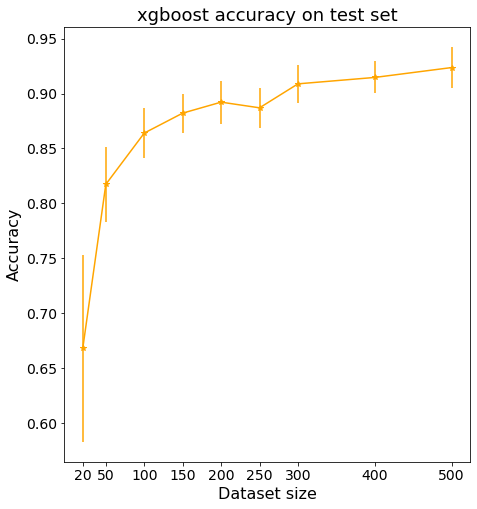

In [9]:
N_samples = [20, 50, 100, 150, 200, 250, 300, 400, 500]

mean_acc=[]
std_acc=[]
for n in N_samples:
    test_acc=np.loadtxt(f'test_acc{n}.dat',delimiter=" ",dtype=float)
    mean_acc.append(test_acc.mean())
    std_acc.append(test_acc.std())
fig = plt.figure(figsize = (16,8))
ax1 = fig.add_subplot(121)
ax1.set_title('xgboost accuracy on test set', fontsize = 18)
ax1.set_xlabel('Dataset size', size = 16)
ax1.set_ylabel('Accuracy',size = 16)
plt.xticks(N_samples)
ax1.errorbar(N_samples, mean_acc, yerr = std_acc, fmt='*', color = 'orange', label = 'error bars', ls = '-')
plt.show()
    
    